In [1]:
#Import Useful Modules
#from pyatmos import download_sw_nrlmsise00, read_sw_nrlmsise00 #atmosphere data
#from pyatmos import nrlmsise00
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
import time
import pandas as pd
plt.style.use('classic')

In [2]:
#Earth Parameters
r_e = 6.371*1e6 #m
G_e = 3.986*1e14 #m3⋅s−2

In [3]:
alt_t = {}
xr_t = {}
dr_t = {}
a_t = {}
M_t = {}
t_list = {}

for k in np.linspace(0,8,5):
    alt_t[k]={}
    xr_t[k]={}
    dr_t[k]={}
    a_t[k]={}
    M_t[k]={}
    t_list[k]={}

    
    for j in np.linspace(0, 180, 37):
        alt_t[k][j] = []
        xr_t[k][j] = []
        dr_t[k][j] = []
        a_t[k][j] = []
        M_t[k][j] = []
        t_list[k][j] = []
        
        file_name = 'data/cones_leo_a'+str(k)+'_b'+str(j)
        if k == 0:
            file_name = 'data/cones_leo_a0-01_b'+str(j)
        file_name = file_name.replace(".", "-")+'.csv'
        
        df = pd.read_csv(file_name)
        
        for t_inst in range(len(df['time'])):
            r_inst = np.array([df['r_x'].iloc[t_inst], df['r_y'].iloc[t_inst], df['r_z'].iloc[t_inst]])
            r_mag = np.linalg.norm(r_inst)
            d_vec = r_inst/r_mag
            
            lat_inst = (np.pi/2)-np.arccos(d_vec[2])
            long_inst = np.arccos(d_vec[0]/np.sin((np.pi/2)-lat_inst)) 
            if np.sign(d_vec[1])<0:
                long_inst = 2*np.pi-long_inst
            
            if (r_mag-r_e)<1.05*400000*0.3048:
                alt_t[k][j].append(r_mag)
                xr_t[k][j].append(lat_inst*180/np.pi)
                dr_t[k][j].append(long_inst*180/np.pi)
                a_t[k][j].append(df['a'].iloc[t_inst])
                t_list[k][j].append(t_inst)
                M_t[k][j].append(df['M'].iloc[t_inst])
            else: 
                break

<Figure size 640x480 with 0 Axes>

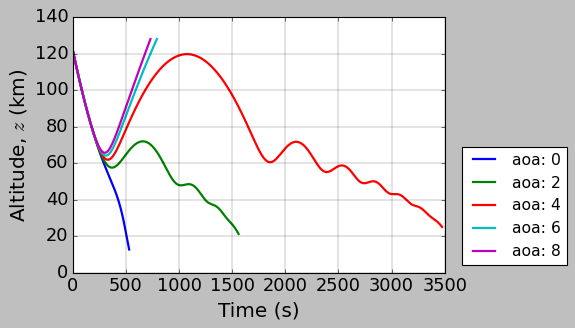

In [4]:
j=0
plt.clf()

plt.figure(figsize=(6,4))

for k in np.linspace(0,8,5):
    plt.plot(t_list[k][j], (np.array(alt_t[k][j])-r_e)/1000, label='aoa: '+str(int(k)), linewidth=2)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(r'Altitude, $z$ (km)', fontsize = 18)
plt.xlabel(r'Time (s)', fontsize = 18)
plt.grid(linestyle='-',linewidth=0.2)
plt.legend(loc='lower right', bbox_to_anchor=(0.85, 0.0, 0.5, 0.5), prop={'size': 14})
plt.show()

<Figure size 640x480 with 0 Axes>

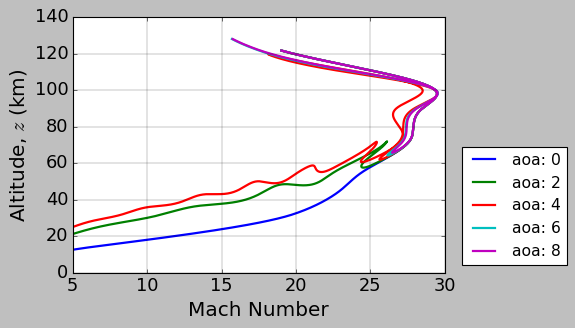

In [5]:
j=0
plt.clf()

plt.figure(figsize=(6,4))

for k in np.linspace(0,8,5):
    plt.plot(M_t[k][j][1:], (np.array(alt_t[k][j][1:])-r_e)/1000, label='aoa: '+str(int(k)), linewidth=2)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(r'Altitude, $z$ (km)', fontsize = 18)
plt.xlabel(r'Mach Number', fontsize = 18)
plt.grid(linestyle='-',linewidth=0.2)
plt.legend(loc='lower right', bbox_to_anchor=(0.85, 0.0, 0.5, 0.5), prop={'size': 14})
plt.show()

<Figure size 640x480 with 0 Axes>

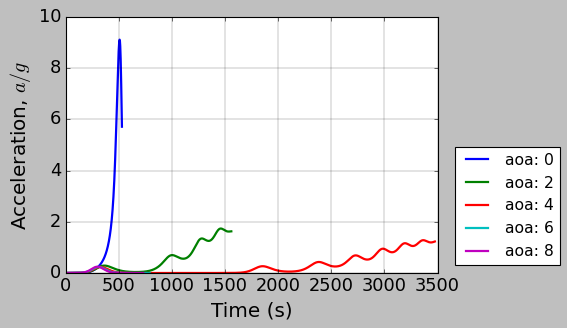

In [6]:
j=0
plt.clf()

plt.figure(figsize=(6,4))

for k in np.linspace(0,8,5):
    plt.plot(t_list[k][j], np.array(a_t[k][j])/9.81, label='aoa: '+str(int(k)), linewidth=2)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(r'Acceleration, $a/g$', fontsize = 18)
plt.xlabel(r'Time (s)', fontsize = 18)
plt.grid(linestyle='-',linewidth=0.2)
plt.legend(loc='lower right', bbox_to_anchor=(0.85, 0.0, 0.5, 0.5), prop={'size': 14})
plt.show()

<Figure size 640x480 with 0 Axes>

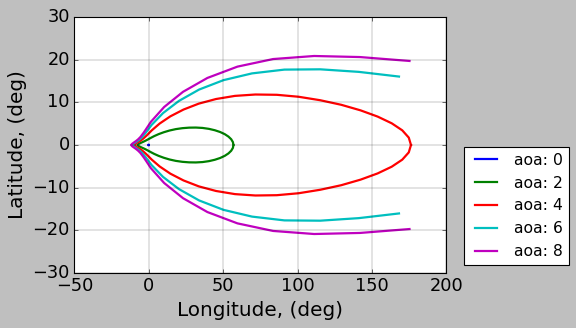

In [7]:
plt.clf()

plt.figure(figsize=(6,4))

for k in np.linspace(0,8,5):
    end_long_set = []
    end_lat_set = []
    for j in np.linspace(0, 180, 37):
        if ((alt_t[k][j][-1]-r_e)/1000)<100:
            end_long_set.append(dr_t[k][j][-1]-dr_t[0][0][-1])
            end_lat_set.append(xr_t[k][j][-1])
    neg_side = plt.plot(end_long_set, end_lat_set, label='aoa: '+str(int(k)), linewidth=2)
    pos_side = plt.plot(end_long_set, -1*np.array(end_lat_set), c=neg_side[0].get_color(), linewidth=2)
    
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel(r'Latitude, (deg)', fontsize = 18)
plt.xlabel(r'Longitude, (deg)', fontsize = 18)
plt.grid(linestyle='-',linewidth=0.2)
plt.legend(loc='lower right', bbox_to_anchor=(0.85, 0.0, 0.5, 0.5), prop={'size': 14})
plt.show()